In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-pokedex/Pokemon.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df= pd.read_csv('/kaggle/input/pokemon-pokedex/Pokemon.csv')

In [4]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
len(df)

1104

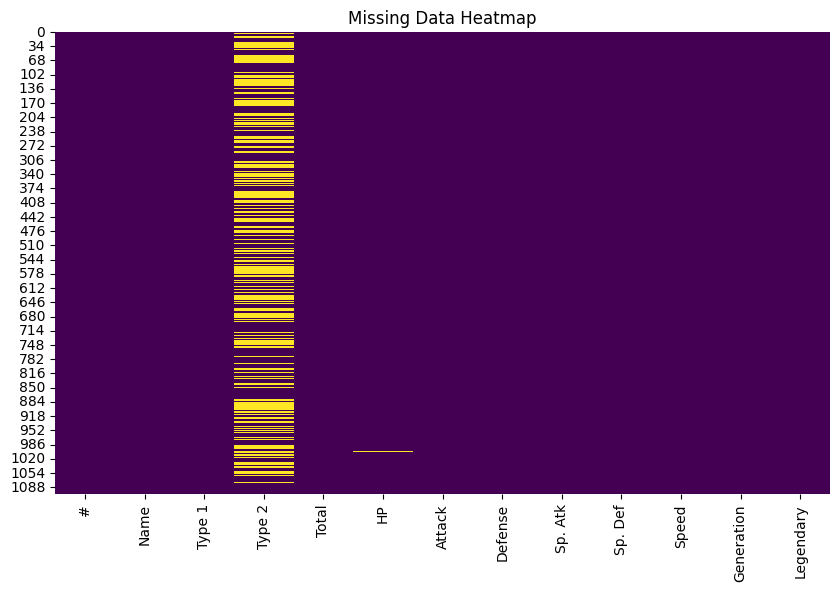

In [6]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
     

In [7]:
(df['Type 2'].isnull().sum()/len(df))*100

46.3768115942029

In [8]:
df['Type 2'].fillna(value='Not Known', inplace=True)

/tmp/ipykernel_18/1140188274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna(value='Not Known', inplace=True)


In [9]:
df.drop(columns=['#'], inplace=True)

In [10]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45.0,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60.0,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80.0,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100,123,122,120,80,1,False
4,Charmander,Fire,Not Known,309,39.0,52,43,60,50,65,1,False
5,Charmeleon,Fire,Not Known,405,58.0,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78.0,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78.0,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78.0,104,78,159,115,100,1,False
9,Squirtle,Water,Not Known,314,44.0,48,65,50,64,43,1,False


In [11]:
df[df['Legendary'] == True]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,Articuno,Ice,Flying,580,90.0,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90.0,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90.0,100,90,125,85,90,1,True
162,Mewtwo,Psychic,Not Known,680,106.0,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106.0,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Not Known,780,106.0,150,70,194,120,140,1,True
262,Raikou,Electric,Not Known,580,90.0,85,75,115,100,115,2,True
263,Entei,Fire,Not Known,580,115.0,115,85,90,75,100,2,True
264,Suicune,Water,Not Known,580,100.0,75,115,90,115,85,2,True
269,Lugia,Psychic,Flying,680,106.0,90,130,90,154,110,2,True
